In [84]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


RAND = 10

Клиенты разделены на сегменты, внутри которых они схожи в определенных аспектах таких как: пол, возраст, семейное положение и т.д.

Сегментация клиентов-это практика разделения клиентской базы на группы людей, которые схожи в определенных аспектах, имеющих отношение к маркетингу, таких как возраст, пол, интересы и привычки к расходам.

Необходимо преобразовать признаки и обучить модель для определения к какому сегменту будут относиться новые люди, а также вывести топ-фичи для каждого сегмента

# Загрузка и первичный анализ данных

1) Прочитать файл customer_segmentation.csv и записать в переменную df

In [85]:
df = pd.read_csv("customer_segmentation.csv")

2) Вывести первые пять строк

In [86]:
df[:5]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


3) Выведите размер датасета

In [87]:
df.shape

(8068, 11)

4) Вывести общую информацию о датафрейме при помощи метода info()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


5) Проанализировать кол-во пропусков, а также посмотреть сколько это в процентах от размера датасета (кол-ва строк)

In [89]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [90]:
df.isna().sum()/df.shape[0] * 100

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
Var_1               0.941993
Segmentation        0.000000
dtype: float64

6) Вывести основные описательные статистики для числовых признаков

In [91]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


7) Вывести основные описательные статистики для категориальных признаков

In [92]:
df.describe(include=object)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


# EDA

8) Посчитайте **в процентах** сколько клиентов в каждом из сегментом Segmentation и визуализируйте при помощи barplot. 

Чтобы отобразить числа над можете прописать следующий код:

In [93]:
var = df.groupby(['Segmentation'])['Segmentation'].count()/df.shape[0] * 100

In [94]:
var.index

Index(['A', 'B', 'C', 'D'], dtype='object', name='Segmentation')

Text(0.5, 0, 'Доля объектов')

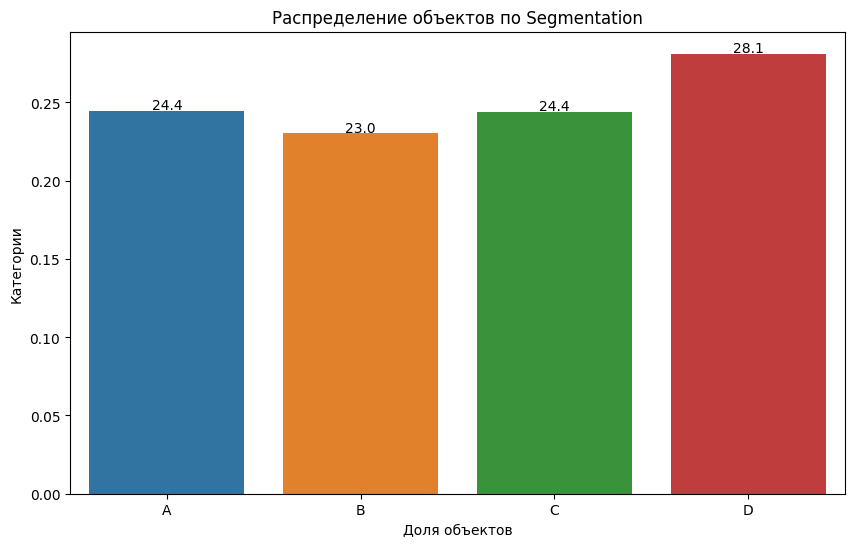

In [95]:
ax = plt.figure(figsize=(10, 6))
segment_values = df.groupby(['Segmentation'])[
    'Segmentation'].count()/df.shape[0]
ax = sns.barplot(x=segment_values.index, y=segment_values.values)

# внутри можно ничего не менять
for p in ax.patches:
    ax.annotate(format(p.get_height()*100, '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 4),
                textcoords='offset points')

# Выведите также наименование графика и подписи по осям при помощи title и других методов из matplolib
plt.title("Распределение объектов по Segmentation")
plt.ylabel("Категории")
plt.xlabel("Доля объектов")

9) Отобразите график **распределения возраста (seaborn.displot) в разрезе сегмента**. Не забывайте про common_norm=False. 

**Какие выводы вы можете сделать? напишите кратко**

In [96]:
df.Age

0       22
1       38
2       67
3       67
4       40
        ..
8063    22
8064    35
8065    33
8066    27
8067    37
Name: Age, Length: 8068, dtype: int64

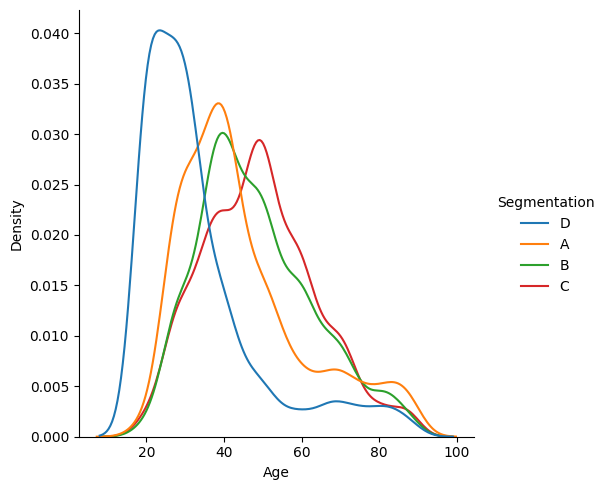

In [97]:
sns.displot(x=df.Age, hue=df.Segmentation, common_norm=False, kind='kde')

Распределение сегментов А, В и С близко к нормальному, сегмент D выделяется низким возрастом представителей относительно других сегментов.

10) Отобразите **график распределения возраста в разрезе пола**. Не забывайте про common_norm=False.

**Какие выводы вы можете сделать? напишите кратко**

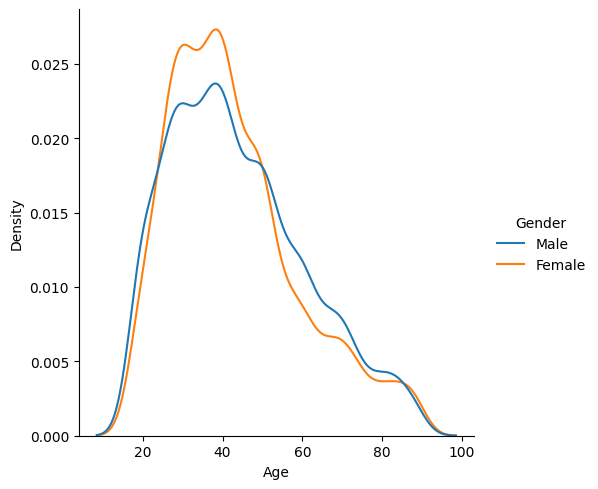

In [98]:
sns.displot(x=df.Age, hue=df.Gender, common_norm=False, kind='kde')

In [99]:
df.groupby(["Gender"])['Gender'].count()

Gender
Female    3651
Male      4417
Name: Gender, dtype: int64

Распределения объектов по полу близки к нормальному, категория Female менее сбалансирована относительно Male

11) Отобразите на графике долю людей (ось OY) в разрезе пола (ось OX) по каждому сегменту (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из сегментов, **пример был в ноутбке по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

Например, если в сегменте А всего 120 людей, мужчин 20, а женщин 100, то тогда мужчин - 16,7%, женщин 83,3%

**Какие выводы вы можете сделать? напишите кратко**

In [100]:
def barplot_group(col_main: str, col_group: str, title: str) -> None:
    """
    Построение barplot с нормированными данными с выводом значений на графике
    """

    plt.figure(figsize=(15, 6))

    data = (df.groupby([col_group])[col_main]
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values(col_group))

    ax = sns.barplot(x=col_main, y="percentage",
                     hue=col_group, data=data, palette='rocket')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        ax.annotate(percentage,  # текст
                    (p.get_x() + p.get_width() / 2.,
                     p.get_height()),  # координата xy
                    ha='center',  # центрирование
                    va='center',
                    xytext=(0, 7),
                    textcoords='offset points',  # точка смещения относительно координаты
                    fontsize=12)

    plt.title(title, fontsize=16)
    plt.ylabel('Percentage', fontsize=14)
    plt.xlabel(col_main, fontsize=14)
    plt.show()

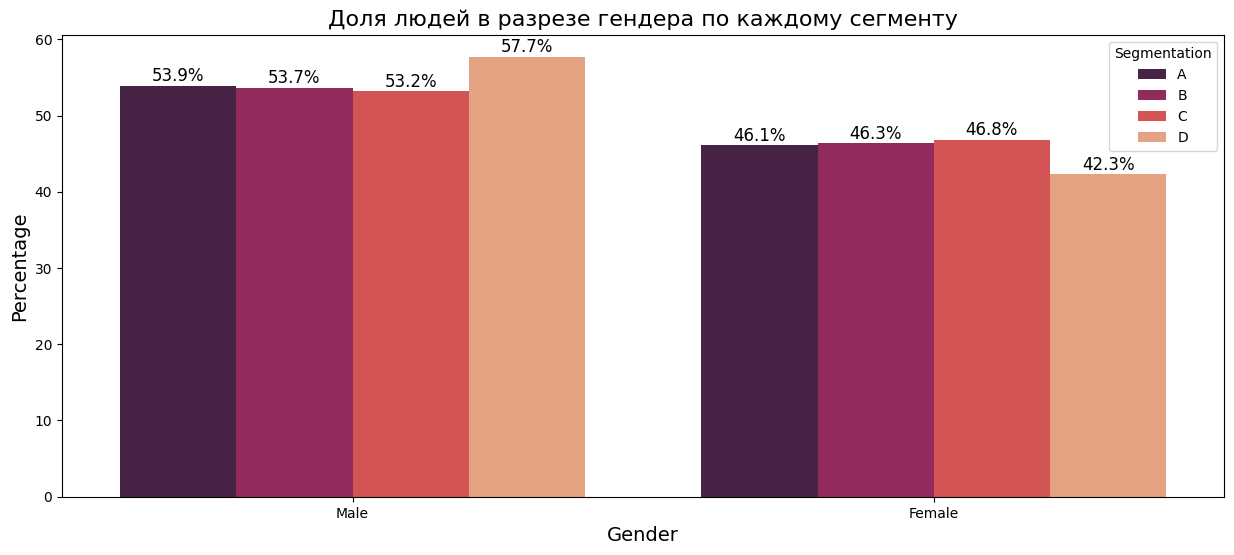

In [101]:
barplot_group('Gender', 'Segmentation', "Доля людей в разрезе гендера по каждому сегменту")

Сегмента D выделяется большим процентом мужского пола относительно других сегментов

12) Отобразите на графике долю людей (ось OY) в разрезе профессии Profession (ось OX) по каждому сегменту (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из сегментов, **пример был в ноутбке по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

**Какие выводы вы можете сделать? напишите кратко**

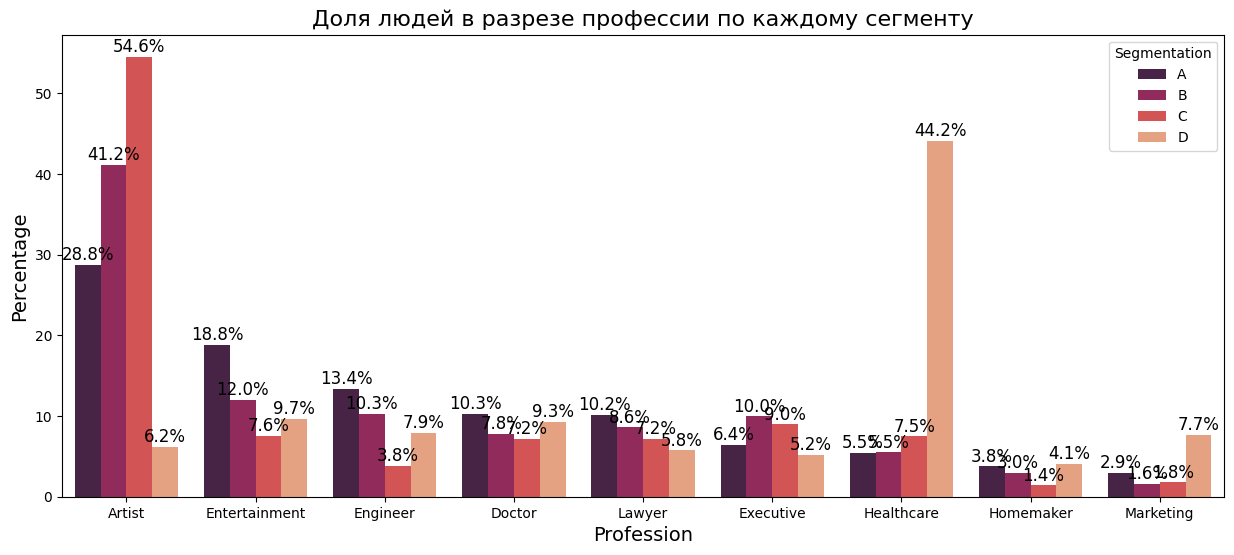

In [102]:
barplot_group('Profession', "Segmentation", "Доля людей в разрезе профессии по каждому сегменту")

В сегментах A, B и C больше всего артистов, в сегменте D - сотдрутников здравоохранения

13) Отобразите на графике долю людей (ось OY) в разрезе образования Graduated (ось OX) по каждому сегменту (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из сегментов, **пример был в ноутбке по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

**Какие выводы вы можете сделать? напишите кратко**

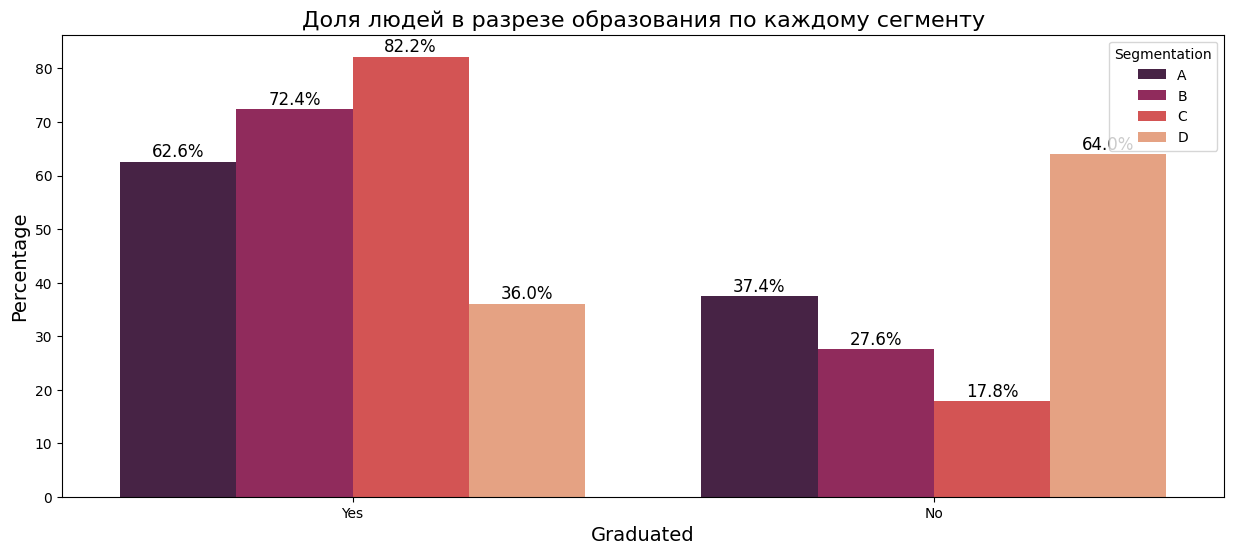

In [103]:
barplot_group('Graduated', 'Segmentation', "Доля людей в разрезе образования по каждому сегменту")

В группе D значительно ниже процент людей, имеющих образование, относительно других категорий

14) Отобразите график **распределения опыта работы в разрезе от сегмента**. Не забывайте про common_norm=False.

**Какие выводы вы можете сделать? напишите кратко**

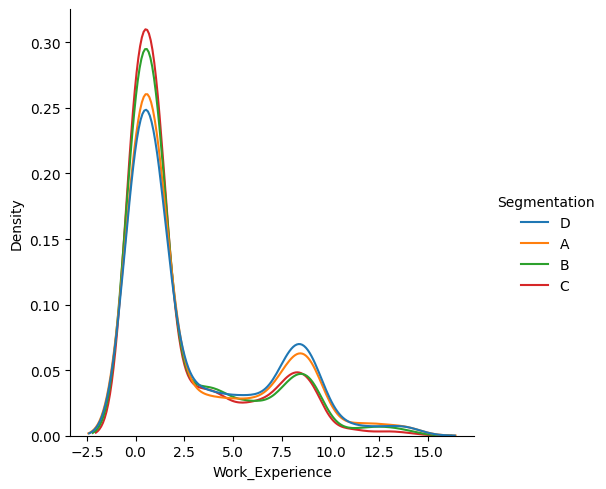

In [104]:
sns.displot(data=df, x='Work_Experience', hue='Segmentation', kind='kde', common_norm=False)

Распределения сегментов B и С идентично. В сегментах A и D доли опытных сотрудников выше

15) Отобразите график, на котором бы вы сравнили среднее значение (медианное) опыта работы в разрезе сегментов. 

**Какие выводы вы можете сделать? напишите кратко**

In [105]:
df.groupby(['Segmentation']).mean()

/tmp/ipykernel_6155/2618234966.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Segmentation']).mean()


,ID,Age,Work_Experience,Family_Size
Segmentation,,,,
A,463457.893002,44.924949,2.874578,2.439531
B,463520.253498,48.200215,2.378151,2.696970
C,463576.043655,49.144162,2.240771,2.974559
D,463380.026896,33.390212,3.021717,3.232624


<AxesSubplot: xlabel='Work_Experience', ylabel='Segmentation'>

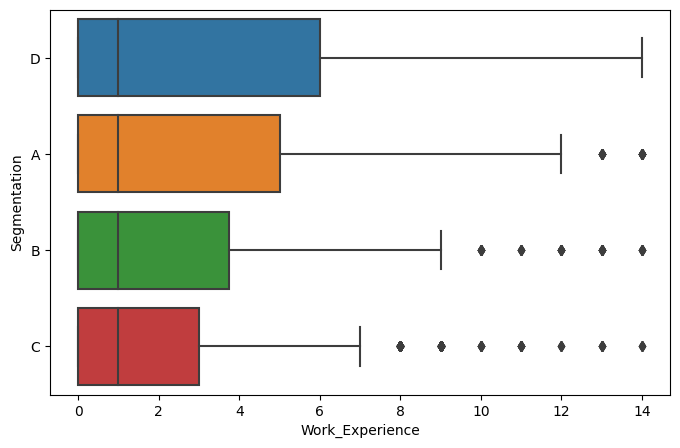

In [106]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df.Segmentation, x=df.Work_Experience, orient='h')

<AxesSubplot: xlabel='Segmentation', ylabel='Work_Experience'>

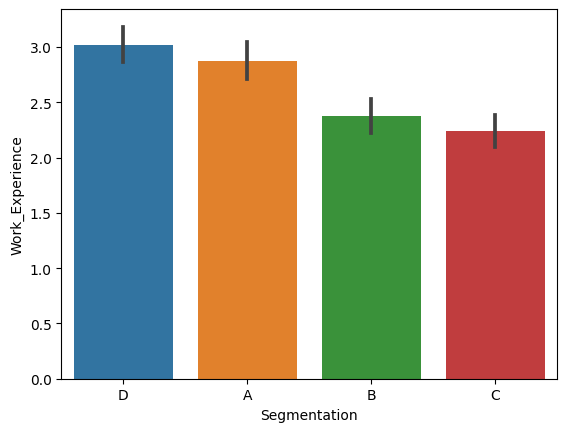

In [107]:
sns.barplot(data=df, x='Segmentation', y='Work_Experience')

Значения медиан во всех сегментах равны между собой, среднее значения опыта работы сотрудников в категориях A и D выше, чем в B и С

16) Отобразите на графике долю людей (ось OY) в разрезе Spending_Score (ось OX) по каждому сегменту (hue).

- Данные должны быть **нормированы** на  кол-во людей в каждом из сегментов, **пример был в ноутбке по EDA анализу**.

- Не забудьте указать цифры (%) на графике для каждого бара, как это делалось ранее. 

**Какие выводы вы можете сделать? напишите кратко**

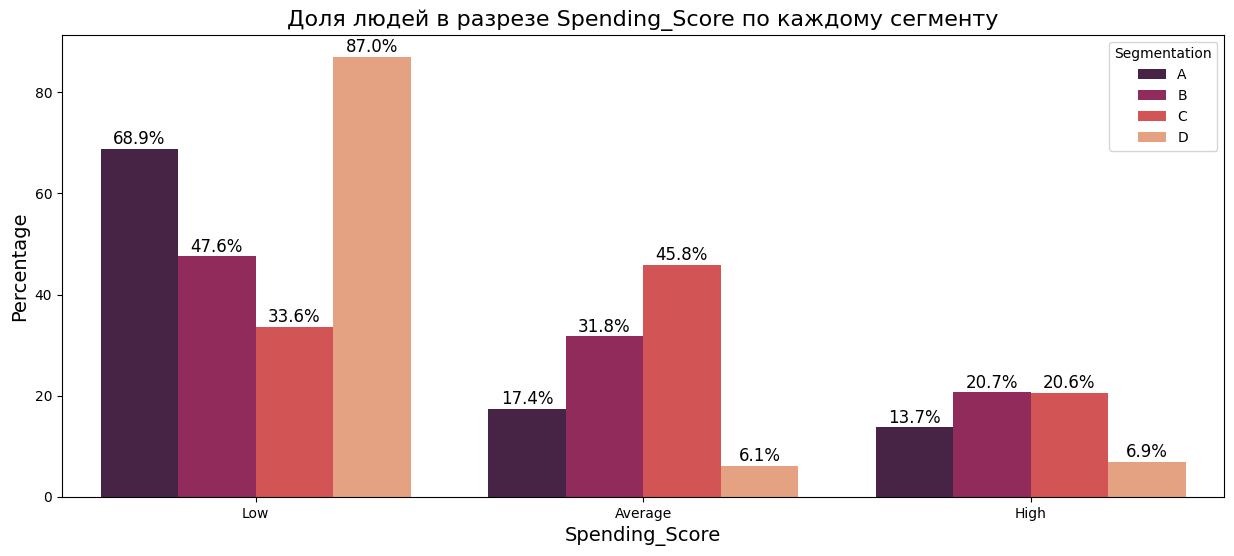

In [108]:
barplot_group('Spending_Score', 'Segmentation', "Доля людей в разрезе Spending_Score по каждому сегменту")

Доля людей, имеющих низкий Spending_score, в сегментах A и D значительно выше, чем в B и С 

16) Отобразите скрипичную диаграмму (seaborn.violinplot) кол-ва членов в семье Family_Size (ось OY) в разрезе сегментов (ось OX)

**Какие выводы вы можете сделать? напишите кратко**

<AxesSubplot: xlabel='Segmentation', ylabel='Family_Size'>

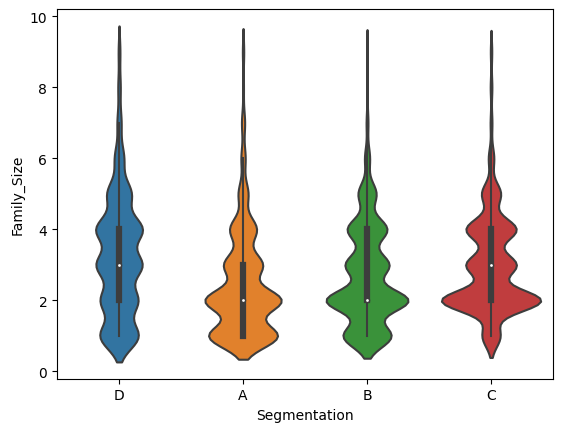

In [109]:
sns.violinplot(data=df, x='Segmentation', y='Family_Size')

Семьи людей сегмента D больше по количеству членов семьи относительно других сегментах

17) **Заполнение пропусков**

Заполните пропуски в признаках при помощи **группировки по Age**:
- модой для признаков Ever_Married, Graduated, Profession, Var_1
- медианой для признаков Work_Experience, Family_Size.

Подсказки:
- dataset[column].fillna(dataset.groupby('Age')[column].transform(function)

- Как подставить моду в transform: transform(lambda x: x.mode()[0])

In [110]:
df.fillna({col: df.groupby(['Age'])[col].transform(lambda x: x.mode()[0])
          for col in ['Ever_Married', 'Graduated', 'Profession', 'Var_1']}, inplace=True)

df.fillna({col: df.groupby(['Age'])[col].transform(lambda x: x.mode()[0])
          for col in ['Work_Experience', 'Family_Size']}, inplace=True)

18) Проверьте, остались ли пропуски в данных

In [111]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

19) Построить heatmap и посмотреть на корреляцию признаков, что можно отметить?

/tmp/ipykernel_6155/661728506.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f')


<AxesSubplot: >

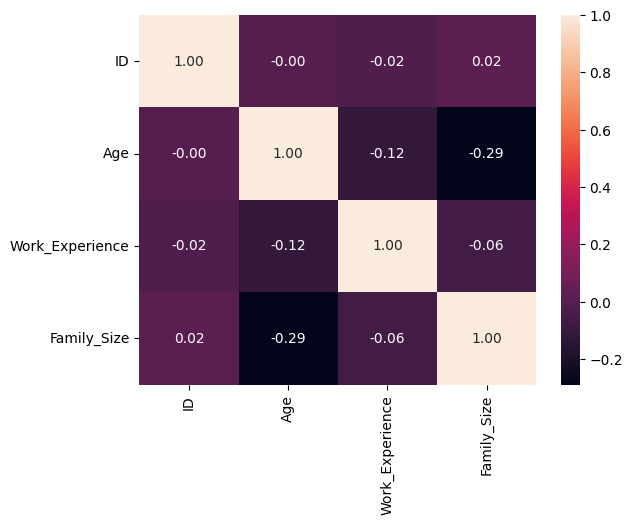

In [112]:
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f')

# Feature engineering

20) Закодировать признаки **Ever_Married, Graduated, Spending_Score** при помощи цифр.

учесть, что например такой признак как Spending_Score имеет нарастающие значения Low, Average, High

In [113]:
df['Spending_Score'].replace({'Low': 0, 'Average': 1, 'High': 2}, inplace=True)
df['Ever_Married'].replace({"No": 0, 'Yes': 1}, inplace=True)
df['Graduated'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [114]:
df[:5]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1.0,0,4.0,Cat_4,D
1,462643,Female,1,38,1,Engineer,0.0,1,3.0,Cat_4,A
2,466315,Female,1,67,1,Engineer,1.0,0,1.0,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0.0,2,2.0,Cat_6,B
4,462669,Female,1,40,1,Entertainment,1.0,2,6.0,Cat_6,A


# Modeling

21) Разбиение данных на тренировочные тестовые

- Удалить столбец ID
- Преобразовать категориальные признаки в бинарный вид (pandas.get_dummies(drop_first=True))
- Закодировать целевую переменную Segmentation при помощи LabelEncoder()
- Разделить выборку на train и test данные, используя стратификацию stratify, где test_size=0.2, а также RAND как random_state
- Чтобы потом использовать roc_auc_score не забывайте про label_binarize() - пример был в лекции

In [155]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, mean_squared_error, mean_absolute_error, \
    precision_score, recall_score, f1_score, roc_auc_score, log_loss, auc, roc_curve,\
    confusion_matrix

In [116]:
x = df.drop('ID', axis=1).drop('Segmentation', axis=1)
y = df['Segmentation']

In [117]:
le = LabelEncoder()

le.fit(y)
y = le.transform(y)

x = pd.get_dummies(x, drop_first=True)

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=RAND)

y_test_bin = label_binarize(y_test, classes=list(set(y)))

std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

22) Обучите в качестве baseline логистическую регрессию, использовав метод из sklearn **каждый против каждого, зафиксируйте только random_state=RAND**

In [120]:
lr = LogisticRegression(random_state=RAND)

ovo = OneVsOneClassifier(lr)
ovo.fit(x_train_std, y_train)

OneVsOneClassifier(estimator=LogisticRegression(random_state=10))

23) Выведите матрицу ошибок в **одной строке (2 графика в одной строке в двух столбцах)** используя функцию plot_confusion_matrix() для train и test (пример в лекции).

Не забывайте, что при выводе на графике исходных значений сегментов в буквенном варианте, необходимо сделать инвертирование inverse_transform()

In [145]:
a = list(set(le.inverse_transform(y)))
a.sort()
print(a)

['A', 'B', 'C', 'D']


/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


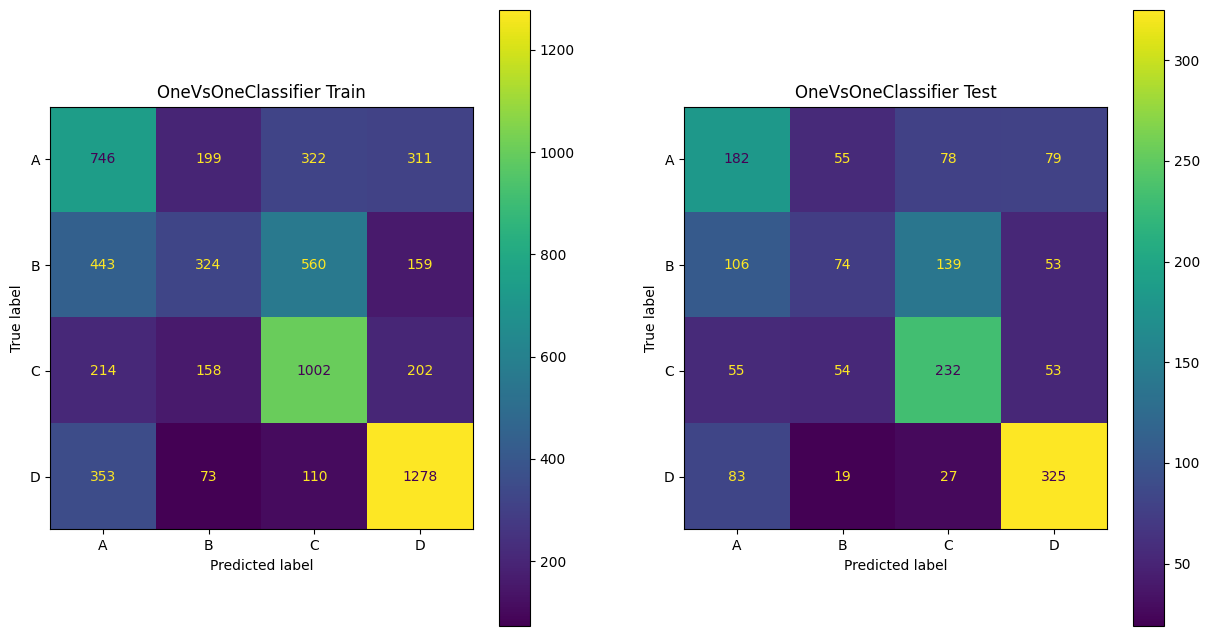

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

plot_confusion_matrix(ovo,
                      x_train_std,
                      y_train,
                      display_labels=a,
                      ax=ax[0])

plot_confusion_matrix(ovo,
                      x_test_std,
                      y_test,
                      display_labels=a,
                      ax=ax[1])

ax[0].title.set_text(type(ovo).__name__ + ' Train')
ax[1].title.set_text(type(ovo).__name__ + ' Test')
plt.show()

24) Какие результаты по основным метрикам вы получили на test? Что можно сказать про модель?

Запишите результат в переменную metrics, используя функцию как в лекции ниже

Может ли она разделять классы?

In [151]:
def get_metrics_multiclass(y_test_bin, y_test, y_pred, y_prob, name,
                           type_multi):
    """
    y_test_bin - бинаризованные тестовые метки класса
    y_test - метки класса без бинаризации
    y_prob - предсказанные вероятности классов
    name - название модели/подхода
    type_multi - тип многоклассовой классификации для ROC-AUC (ovo/ovr)
    """

    df_metrics = pd.DataFrame()

    df_metrics['model'] = [name]

    df_metrics['ROC_AUC'] = roc_auc_score(y_test_bin,
                                          y_prob,
                                          multi_class=type_multi)
    df_metrics['Precision_micro'] = precision_score(y_test,
                                                    y_pred,
                                                    average='micro')
    df_metrics['Precision_macro'] = precision_score(y_test,
                                                    y_pred,
                                                    average='macro')
    df_metrics['Recall_micro'] = recall_score(y_test, y_pred, average='micro')
    df_metrics['Recall_macro'] = recall_score(y_test, y_pred, average='macro')
    df_metrics['F1_micro'] = f1_score(y_test, y_pred, average='micro')
    df_metrics['F1_macro'] = f1_score(y_test, y_pred, average='macro')
    df_metrics['Logloss'] = log_loss(y_test, y_prob)

    return df_metrics

In [153]:
y_pred = ovo.predict(x_test_std)
y_score = ovo.decision_function(x_test_std)

metrics = get_metrics_multiclass(y_test_bin, 
                                 y_test, 
                                 y_pred, 
                                 y_score, 
                                 'OneVsOne_base', 
                                 type_multi='ovo')

metrics

,model,ROC_AUC,Precision_micro,Precision_macro,Recall_micro,Recall_macro,F1_micro,F1_macro,Logloss
0,OneVsOne_base,0.738039,0.503717,0.479554,0.503717,0.491386,0.503717,0.477337,4.048617


Модель разделяет классы плохо, однако roc_auc говорит, что классы разделить можно.

## GridSearch

25) Найдите параметры для LogisticRegression при помощи подхода **каждый против каждого**, используя StratifiedKFold с 3 фолдами, при помощи **GridSearch**

- Метрика для поиска параметров scoring = 'f1_macro'
- Не забывайте фиксировать random_state в StratifiedKFold, а также при поиске гиперпараметров

In [159]:
params = [{
    'estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'estimator__C': np.linspace(1, 10, 5),
    'estimator__solver': ['saga', 'newton-sg', 'lbfgs'],
    'estimator__class_weight': ['balanced']
}]

lr = LogisticRegression(random_state=RAND)
model = OneVsOneClassifier(lr)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RAND)

grid_cv = GridSearchCV(
    model,
    params,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
)

In [160]:
grid_cv.fit(x_train_std, y_train)

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/multiclass.py", line 675, in fit
    Parallel(n_jobs=self.n_jobs)(
  File "/home/user/jupyter_env/lib/python3.8/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
             estimator=OneVsOneClassifier(estimator=LogisticRegression(random_state=10)),
             n_jobs=-1,
             param_grid=[{'estimator__C': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ]),
                          'estimator__class_weight': ['balanced'],
                          'estimator__penalty': ['l1', 'l2', 'elasticnet'],
                          'estimator__solver': ['saga', 'newton-sg', 'lbfgs']}],
             scoring='f1_macro')

26) Выведите наилучшие значения метрик и параметры после обучения GridSearchCV

In [166]:
print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'estimator__C': 1.0, 'estimator__class_weight': 'balanced', 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}
0.48822004424112003


27) Какие результаты по основным метрикам вы получили на test? Запишите результат в переменную metrics, используя ранее  функцию get_metrics_multiclass()

Есть ли улучшения по сравнения с baseline (предыдущее обучение без подбора параметров)? 

**Если вы получили f1_macro меньше 0.487, то нужно тщательнее подобрать параметры для GridSearchCV**

In [167]:
y_pred = grid_cv.predict(x_test_std)
y_proba = grid_cv.decision_function(x_test_std)

metrics = metrics.append(get_metrics_multiclass(y_test_bin, y_test, y_pred, y_score, 'OVO_gridCV', 'ovo'))
metrics

/tmp/ipykernel_6155/800917436.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(get_metrics_multiclass(y_test_bin, y_test, y_pred, y_score, 'OVO_gridCV', 'ovo'))


,model,ROC_AUC,Precision_micro,Precision_macro,Recall_micro,Recall_macro,F1_micro,F1_macro,Logloss
0,OneVsOne_base,0.738039,0.503717,0.479554,0.503717,0.491386,0.503717,0.477337,4.048617
0,OVO_gridCV,0.738039,0.507435,0.489644,0.507435,0.497118,0.507435,0.490189,4.048617
0,OVO_gridCV,0.738039,0.507435,0.489644,0.507435,0.497118,0.507435,0.490189,4.048617


28) Выведите матрицу ошибок в **одной строке (2 графика в одной строке в двух столбцах)** plot_confusion_matrix для train и test.

- Не забывайте, что при выводе на графике исходных значений сегментов в буквенном варианте, необходимо сделать инвертирование inverse_transform()
- Сделайте сравнение при помощи subplots матрицы ошибок для baseline и поиска по сетке, подпишите названия каждого графика использовать массив осей (ax)

/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/user/jupyter_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


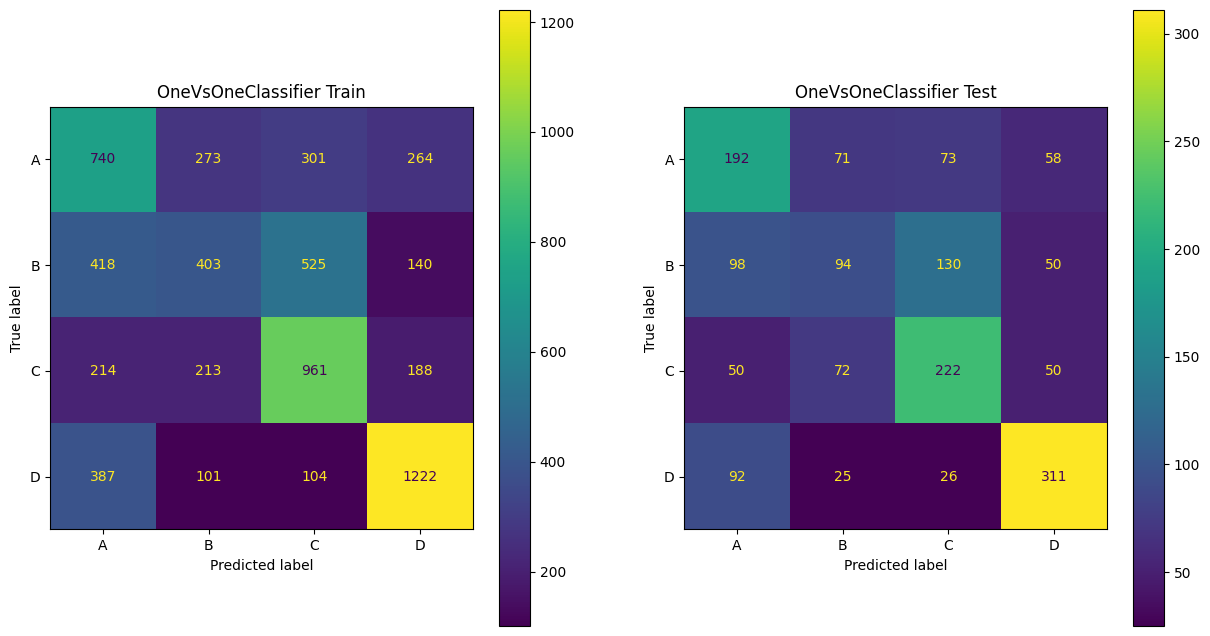

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

plot_confusion_matrix(grid_cv,
                      x_train_std,
                      y_train,
                      display_labels=a,
                      ax=ax[0])

plot_confusion_matrix(grid_cv,
                      x_test_std,
                      y_test,
                      display_labels=a,
                      ax=ax[1])

ax[0].title.set_text(type(ovo).__name__ + ' Train')
ax[1].title.set_text(type(ovo).__name__ + ' Test')
plt.show()

29) **Важность признаков**

- Необходимо найти веса для каждого из признаков, использовав обученные модели при помощи GridSearchCV в прошлом задании
- Для вывода наилучшей модели использовать grid_cv.best_estimator_.estimators_
- Чтобы получить веса, например, для модели под индексом 0: grid_cv.best_estimator_.estimators_[i].coef_[0]
- Записать в новый датафрейм **feature_importance** названия признаков и соответствующее усредненное значение веса: 
    - столбец **feature** - название признака
    - столбец **value** - среднее значение веса для этого признака и отсортировать по убыванию

- Подсказка:

Ко-во классификаторов для OVO  всегда четное 𝐾=𝑁(𝑁−1)/2. Поэтому необходимо усреднить значения весов по всем классификаторам.

In [172]:
grid_cv.best_estimator_.estimators_[0].coef_

array([[ 0.20892096,  0.21317766,  0.22015106, -0.13527336,  0.26643682,
         0.19040491, -0.09847265, -0.16010568, -0.18021272, -0.23923699,
        -0.11968845, -0.08139141, -0.08509488, -0.36726358, -0.15314312,
         0.0728799 , -0.01744723, -0.07980768,  0.06148512,  0.0208293 ,
        -0.03039804]])

In [190]:
length = int(len(a) * (len(a) - 1) / 2)
coefs = []

for i in range(length):
    coefs.append(grid_cv.best_estimator_.estimators_[i].coef_[0])

coefs

[array([ 0.20892096,  0.21317766,  0.22015106, -0.13527336,  0.26643682,
         0.19040491, -0.09847265, -0.16010568, -0.18021272, -0.23923699,
        -0.11968845, -0.08139141, -0.08509488, -0.36726358, -0.15314312,
         0.0728799 , -0.01744723, -0.07980768,  0.06148512,  0.0208293 ,
        -0.03039804]),
 array([ 0.22589696,  0.24002912,  0.35459632, -0.12251767,  0.44771744,
         0.51962739, -0.09366546, -0.18056421, -0.424689  , -0.40925329,
        -0.27395626,  0.15947189, -0.18935424, -0.47545263, -0.13505054,
         0.00108464, -0.02445626, -0.3039104 ,  0.03486495,  0.15452993,
         0.00728293]),
 array([-0.26578165, -0.40324895, -0.31746835,  0.03214967, -0.21250531,
         0.18721605,  0.17937   ,  0.26255862,  0.23688878,  0.21017145,
         0.31929265,  1.02119563,  0.24567965,  0.5493406 ,  0.39997185,
        -0.07837013, -0.12414256, -0.10154517, -0.03093469, -0.05617767,
        -0.05721231]),
 array([ 0.07645182,  0.13742385,  0.1999872 ,  0.01004

In [201]:
mean_coefs = np.mean(np.column_stack(coefs), axis=1)
mean_coefs

array([-0.05689163, -0.17228338, -0.09636233,  0.02369846, -0.07937017,
        0.11384796,  0.05590108,  0.11560403,  0.05698875,  0.06660385,
        0.13370865,  0.5383545 ,  0.08424064,  0.19468428,  0.19751964,
       -0.05098726, -0.07509613, -0.06690325, -0.0024966 , -0.01508905,
       -0.03612595])

In [205]:
feature_importance = pd.DataFrame(mean_coefs ,index=x_train.keys(), columns=['value'])
feature_importance

,value
Ever_Married,-0.056892
Age,-0.172283
Graduated,-0.096362
Work_Experience,0.023698
Spending_Score,-0.079370
Family_Size,0.113848
Gender_Male,0.055901
Profession_Doctor,0.115604
Profession_Engineer,0.056989
Profession_Entertainment,0.066604
